In [2]:
import os
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb=10'

import gc
Vec = []

vectorizer = TfidfVectorizer()
content_set = []
for count in range(0,31962):
    # READ article file
    article_path = "C:/Users/25031/Desktop/dataset/" + str(count) + ".txt"
    file = open(article_path, 'r', encoding='utf-8')
    content = file.read()
    content_set.append(content)
    file.close()



# process by TFIDF model
X = vectorizer.fit_transform(content_set)
outputs = X.toarray()
folder_path = "C:/Users/25031/Desktop/BASELINE/"
file_path = folder_path + "TFIDF.txt"
with open(file_path, 'w', encoding='utf-8') as f:
  f.write(str(outputs))
    


In [3]:
# 把所以文章的创建日期读出来
import json

jsonfile = "C:/Users/25031/Desktop/新建文件夹/data_clean/publico/news_publico.json"
dct = []
with open(jsonfile, 'r', encoding='utf-8') as f:
    data = json.load(f)

    
for article in data :
    dct.append(article['date'][0:10])
print(dct[352])


2023-05-15


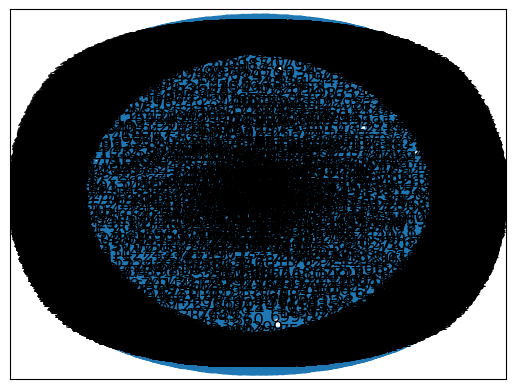

In [42]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity



# 创建图
G = nx.Graph()

# 往图中添加节点
for i in range(31962):
    G.add_node(i, date=dct[i])

for i in range(31962):
    for j in range(i+1, 3):
        # 计算embedding的余弦相似度
        similarity = cosine_similarity([outputs[i]], [outputs[j]])[0][0]
        # 根据文章发布日期调整相似度
        date_diff = abs((np.datetime64(dct[i]) - np.datetime64(dct[j])).astype(int))
        weight = similarity / (date_diff + 1)  # +1是为了防止除以0的情况发生
        # 添加边
        G.add_edge(i, j, weight=weight)


In [ ]:
nx.draw_networkx(G)
# 显示图
plt.show()

In [3]:
print(outputs.shape)
print(len(outputs))

(31962, 60769)
31962


In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import markov_clustering as mc
from scipy.sparse import csr_matrix

embeddings_float32 = outputs.astype(np.float32)

# 将embeddings转换为稀疏矩阵
sparse_embeddings = csr_matrix(embeddings_float32)

# 余弦相似度
similarity_matrix = cosine_similarity(sparse_embeddings)

# 创建图
graph = nx.from_numpy_array(similarity_matrix)

# 图——>matrix
matrix = nx.to_scipy_sparse_matrix(graph)



KeyboardInterrupt: 

In [ ]:
# MCL
result = mc.run_mcl(matrix)
clusters = mc.get_clusters(result)

# 打印聚类结果
for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")

In [44]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import markov_clustering as mc

# 转换图为邻接矩阵
matrix = nx.to_scipy_sparse_matrix(G)

# 运行MCL算法
result = mc.run_mcl(matrix)

clusters = mc.get_clusters(result)

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {cluster}")


C:\Users\25031\AppData\Local\Temp\ipykernel_22324\1032504293.py:7: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  matrix = nx.to_scipy_sparse_matrix(G)


Cluster 0: (0,)
Cluster 1: (1,)
Cluster 2: (2,)
Cluster 3: (3,)
Cluster 4: (4,)
Cluster 5: (5,)
Cluster 6: (6,)
Cluster 7: (7,)
Cluster 8: (8,)
Cluster 9: (9,)
Cluster 10: (10,)
Cluster 11: (11,)
Cluster 12: (12,)
Cluster 13: (13,)
Cluster 14: (14,)
Cluster 15: (15,)
Cluster 16: (16,)
Cluster 17: (17,)
Cluster 18: (18,)
Cluster 19: (19,)
Cluster 20: (20,)
Cluster 21: (21,)
Cluster 22: (22,)
Cluster 23: (23,)
Cluster 24: (24,)
Cluster 25: (25,)
Cluster 26: (26,)
Cluster 27: (27,)
Cluster 28: (28,)
Cluster 29: (29,)
Cluster 30: (30,)
Cluster 31: (31,)
Cluster 32: (32,)
Cluster 33: (33,)
Cluster 34: (34,)
Cluster 35: (35,)
Cluster 36: (36,)
Cluster 37: (37,)
Cluster 38: (38,)
Cluster 39: (39,)
Cluster 40: (40,)
Cluster 41: (41,)
Cluster 42: (42,)
Cluster 43: (43,)
Cluster 44: (44,)
Cluster 45: (45,)
Cluster 46: (46,)
Cluster 47: (47,)
Cluster 48: (48,)
Cluster 49: (49,)
Cluster 50: (50,)
Cluster 51: (51,)
Cluster 52: (52,)
Cluster 53: (53,)
Cluster 54: (54,)
Cluster 55: (55,)
Cluster 56: 